# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

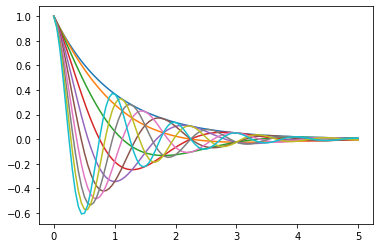

In [197]:
import matplotlib.pyplot as plt
import numpy as np

def funct(x, theta):
    return np.cos(np.pi * theta * x)* np.exp(-x)

theta_vals = np.linspace(0,2,10)
x = np.linspace(0,5,100)
fig, ax = plt.subplots()

for theta in theta_vals:
    ax.plot(x, funct(x, theta))

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

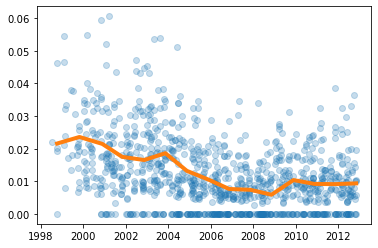

In [34]:
import pandas as pd

df = pd.read_csv('data/tennis.csv')
df['start date'] = pd.to_datetime(df['start date'])
df['DF to TP ratio'] = df['player1 double faults'] / df['player1 total points total'] 
x = df['start date']
y = df['DF to TP ratio']
gb = df.groupby('year')

fig, ax = plt.subplots(1,1)
ax.plot_date(x, y, alpha=0.25)
ax.plot_date(pd.to_datetime(gb['start date'].max()), gb['DF to TP ratio'].mean(), "-", lw=4)

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


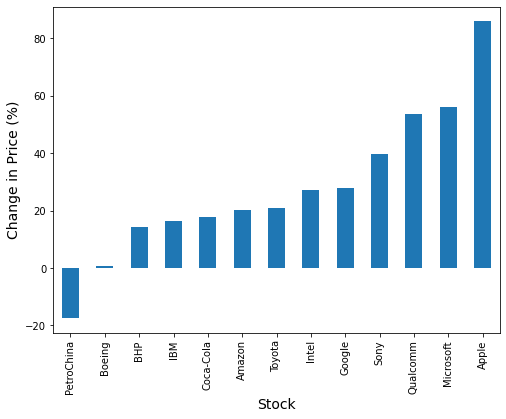

In [8]:
import datetime as dt 
from pandas_datareader import data 


ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 1),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

percent_change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = percent_change.iloc[-1]
price_change = price_change.sort_values().rename(index=ticker_list)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Stock', fontsize=14)
ax.set_ylabel('Change in Price (%)', fontsize=14)
price_change.plot(kind='bar', ax=ax);


# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

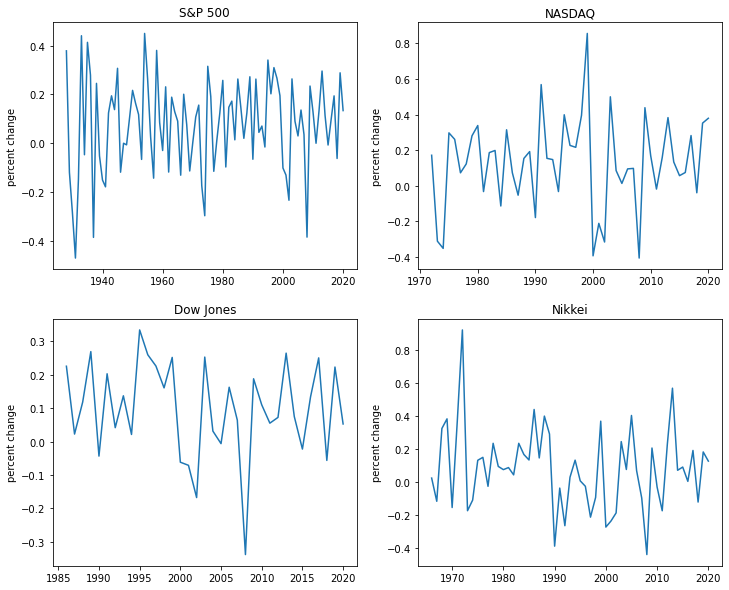

In [27]:
import matplotlib.pyplot as plt

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

stock_labels = list(indices_list.values())
indices = read_data(indices_list, 
                    start=dt.datetime(1920, 1, 1), 
                    end=dt.datetime(2020, 12, 31))

n_rows, n_cols = 2, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 10))

idx = 0
for i in range(n_rows):
    for j in range(n_cols):
        keys = list(indices_list.keys())[idx]
        no_na = indices[keys].dropna()
        last_value = no_na.groupby(no_na.index.year).last()   # we only want the last value of each year
        percent_change = last_value.pct_change()
        ax[i, j].plot(percent_change, '-')
        ax[i, j].set_title(labels[idx])
        ax[i, j].set_ylabel('percent change', size = 10)
        idx += 1
plt.show()



# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

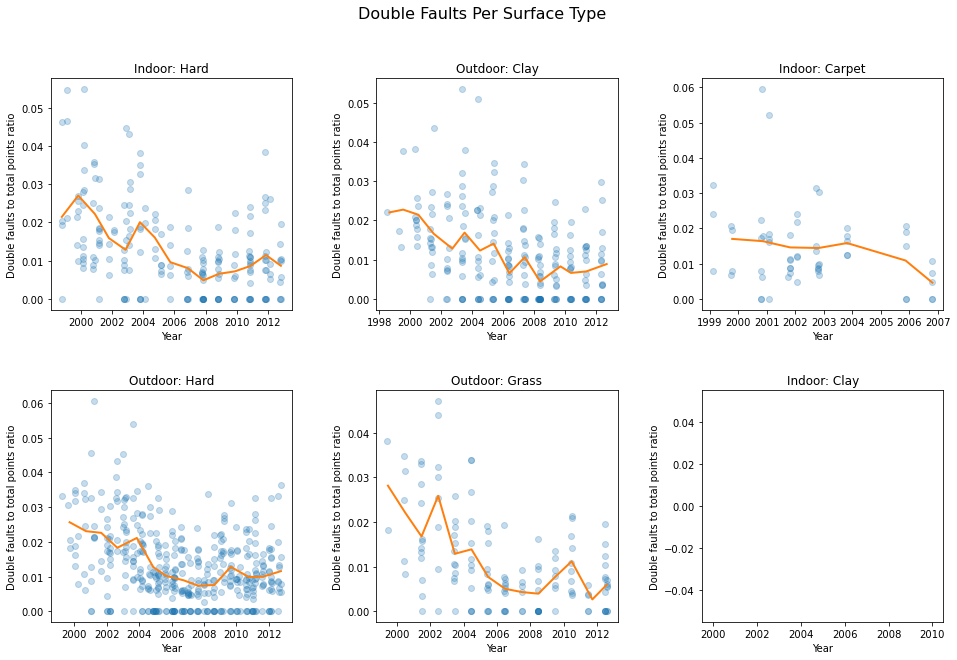

In [38]:
import pandas as pd

df = pd.read_csv('data/tennis.csv')
df['start date'] = pd.to_datetime(df['start date'])
df['DF to TP ratio'] = df['player1 double faults'] / df['player1 total points total'] 
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
fig.suptitle('Double Faults Per Surface Type', fontsize = 16)

surfaces = df.surface.unique()
for surface in surfaces:
    df_s = df[df.surface == surface]

s_new = [surfaces[0:3], surfaces[3:7]]

for i in range(num_rows):
    for j in range(num_cols):
        surface = s_new[i][j]
        df_s = df[df.surface == surface]
        gb = df_s.groupby('year')
        axes[i, j].plot_date(pd.to_datetime(df_s['start date']), df_s['DF to TP ratio'], alpha = 0.25)
        axes[i, j].plot_date(pd.to_datetime(gb['start date'].max()), gb['DF to TP ratio'].mean(), "-", lw=2)
        t = f'{surface}'
        axes[i, j].set(title=t, xlabel = 'Year', ylabel = 'Double faults to total points ratio')
        fig.subplots_adjust(wspace = 0.35, hspace = 0.35)
